In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [75]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import R2Score

In [59]:
const_path = '/content/drive/My Drive/LSTM INTERNSHIP'

In [60]:
bitcoin_data = pd.read_excel(os.path.join(const_path,"bitcoin_past_2_yrs.xlsx"))

In [61]:
# Convert the 'Date' column to datetime format
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'], format='%d-%m-%Y')

# Sort the data by date
bitcoin_data = bitcoin_data.sort_values('Date')

# Remove commas from the 'Price' column and convert to float
bitcoin_data['Price'] = bitcoin_data['Price'].str.replace(',', '').astype(float)

<Axes: >

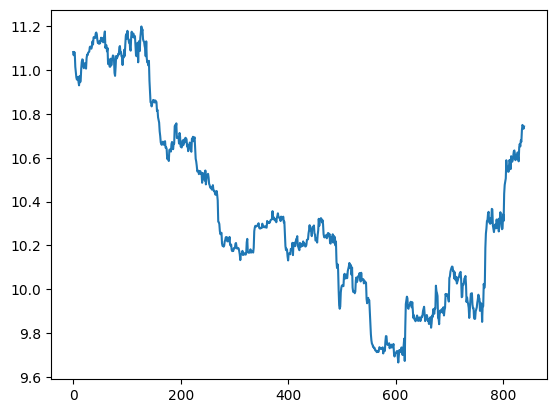

In [62]:
bitcoin_logged = np.log(bitcoin_data['Price'])
bitcoin_logged.plot()

<Axes: >

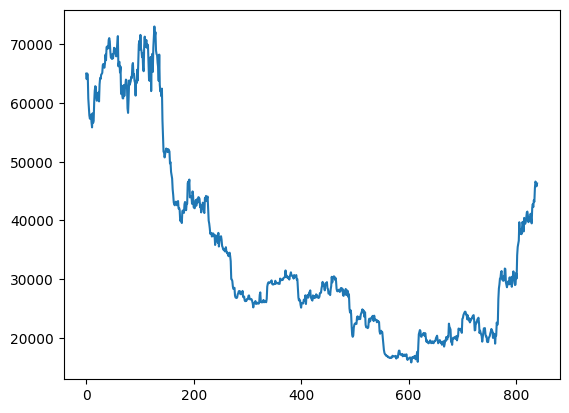

In [63]:
bitcoin_data['Price'].plot()

In [64]:
# Scale the data to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(bitcoin_logged.values.reshape(-1,1))

In [65]:
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

In [66]:
# Create sequences with a sequence length of 45
seq_length = 5
x, y = create_sequences(scaled_data, seq_length)

(835, 5, 1)

In [69]:
x_train, x_test = x[:635], x[635:]
y_train, y_test = y[:635], y[635:]
x_train.shape, x_test.shape, type(y_train), y_train.shape

((635, 5, 1), (200, 5, 1), numpy.ndarray, (635, 1))

In [54]:
# def r_squared_diff(y_true, y_pred):
#     diff_true = y_true[1:] - y_true[:-1]
#     diff_pred = y_pred[1:] - y_pred[:-1]
#     ss_res = K.sum(K.square(diff_true - diff_pred))
#     ss_tot = K.sum(K.square(diff_true - K.mean(diff_true)))
#     return 1 - ss_res / (ss_tot + K.epsilon())

In [76]:
# Define the LSTM model
def train_lstm(units1,units2,learning_rate, batch_size):
  units1 = int(units1)
  units2 = int(units2)
  batch_size = int(batch_size)
  model = Sequential()
  model.add(LSTM(units1, return_sequences=True, input_shape=(5, 1)))
  model.add(Dropout(0.2))
  model.add(LSTM(units2, return_sequences=False))
  model.add(Dropout(0.2))
  model.add(Dense(25))
  model.add(Dense(1))
  model.compile(optimizer= Adam(learning_rate = learning_rate), loss='mean_squared_error', metrics = [R2Score()])
  model.fit(x_train, y_train, epochs=50, batch_size=batch_size, verbose=0)
  loss, r2 = model.evaluate(x_test, y_test, verbose=0)
  return r2

In [46]:
# early_stopping = EarlyStopping(monitor='val_loss', patience=10)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

In [77]:
pbounds = {
    'units1': (10, 100),           # Number of units in the first LSTM layer
    'units2': (10, 100),           # Number of units in the second LSTM layer
    'learning_rate': (0.0001, 0.01),# Learning rate
    'batch_size': (16, 128)         # Batch size
}
optimizer = BayesianOptimization(f= train_lstm,
                                 pbounds = pbounds,
                                 random_state = 42)
optimizer.maximize(init_points = 4,
                   n_iter = 20)

|   iter    |  target   | batch_... | learni... |  units1   |  units2   |
-------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 1         | 0.9553    | 57.95     | 0.009512  | 75.88     | 63.88     |
| 2         | 0.9369    | 33.47     | 0.001644  | 15.23     | 87.96     |
| 3         | 0.7551    | 83.32     | 0.00711   | 11.85     | 97.29     |
| 4         | 0.8841    | 109.2     | 0.002202  | 26.36     | 26.51     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 5         | 0.7665    | 59.29     | 0.004748  | 75.66     | 63.84     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 6         | 0.9651    | 120.7     | 0.008271  | 45.54     | 51.27     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 7         | 0.9515    | 124.1     | 0.004813  | 71.67     | 96.16     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 8         | 0.9558    | 74.32     | 0.005573  | 99.8      | 40.08     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 9         | 0.9286    | 79.72     | 0.003692  | 50.82     | 12.34     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 10        | 0.9523    | 120.9     | 0.00753   | 36.08     | 88.29     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 11        | 0.9735    | 43.94     | 0.008122  | 43.09     | 91.58     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 12        | 0.9291    | 31.21     | 0.000971  | 57.87     | 19.97     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 13        | 0.8605    | 119.2     | 0.002021  | 23.17     | 43.63     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 14        | 0.7859    | 61.34     | 0.001645  | 82.84     | 26.47     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 15        | 0.9389    | 125.8     | 0.004838  | 24.01     | 24.46     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 16        | 0.9229    | 114.0     | 0.002241  | 45.41     | 69.77     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 17        | 0.9669    | 30.59     | 0.00542   | 12.44     | 11.61     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 18        | 0.9594    | 27.08     | 0.008116  | 82.36     | 97.77     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 19        | 0.952     | 112.0     | 0.005806  | 92.99     | 31.96     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 20        | 0.9053    | 109.3     | 0.004358  | 32.31     | 33.05     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 21        | 0.9499    | 101.6     | 0.004389  | 40.2      | 58.63     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 22        | 0.96      | 117.2     | 0.00695   | 52.22     | 20.9      |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 23        | 0.8943    | 68.46     | 0.004774  | 96.48     | 73.06     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


| 24        | 0.8865    | 33.14     | 0.002957  | 14.48     | 87.96     |


In [99]:
best_params = optimizer.max['params']
units1 = int(best_params['units1'])
units2 = int(best_params['units2'])
learning_rate = best_params['learning_rate']
batch_size = int(best_params['batch_size'])

final_model = Sequential()
final_model.add(LSTM(units1, return_sequences = True, input_shape = (5, 1)))
final_model.add(Dropout(0.2))
final_model.add(LSTM(units2, return_sequences= False))
final_model.add(Dropout(0.2))
final_model.add(Dense(25))
final_model.add(Dense(1))
final_model.compile(optimizer = Adam(learning_rate = learning_rate), loss = 'mean_squared_error', metrics = [R2Score()])
final_model.fit(x_train, y_train, epochs = 50, batch_size = batch_size, verbose = 2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
15/15 - 4s - 258ms/step - loss: 0.0406 - r2_score: -4.4236e-01
Epoch 2/50
15/15 - 0s - 10ms/step - loss: 0.0066 - r2_score: 0.7661
Epoch 3/50
15/15 - 0s - 10ms/step - loss: 0.0020 - r2_score: 0.9302
Epoch 4/50
15/15 - 0s - 20ms/step - loss: 0.0016 - r2_score: 0.9434
Epoch 5/50
15/15 - 0s - 19ms/step - loss: 0.0015 - r2_score: 0.9467
Epoch 6/50
15/15 - 0s - 11ms/step - loss: 0.0013 - r2_score: 0.9553
Epoch 7/50
15/15 - 0s - 10ms/step - loss: 0.0013 - r2_score: 0.9555
Epoch 8/50
15/15 - 0s - 11ms/step - loss: 0.0012 - r2_score: 0.9557
Epoch 9/50
15/15 - 0s - 11ms/step - loss: 0.0013 - r2_score: 0.9543
Epoch 10/50
15/15 - 0s - 23ms/step - loss: 0.0011 - r2_score: 0.9603
Epoch 11/50
15/15 - 0s - 17ms/step - loss: 0.0012 - r2_score: 0.9561
Epoch 12/50
15/15 - 0s - 16ms/step - loss: 0.0011 - r2_score: 0.9594
Epoch 13/50
15/15 - 0s - 20ms/step - loss: 0.0011 - r2_score: 0.9604
Epoch 14/50
15/15 - 0s - 20ms/step - loss: 0.0012 - r2_score: 0.9561
Epoch 15/50
15/15 - 0s - 20ms/step - 

In [100]:
test_loss = final_model.evaluate(x_test, y_test)
print('Test Loss:', test_loss[0])
print('R_square value : ', test_loss[1])

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0011 - r2_score: 0.8433      
Test Loss: 0.0011584381572902203
R_square value :  0.9139230847358704


In [101]:
# Make predictions
predictions = final_model.predict(x_test)
predictions = np.exp(scaler.inverse_transform(predictions))

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


In [102]:
actual = np.exp(scaler.inverse_transform(y_test))

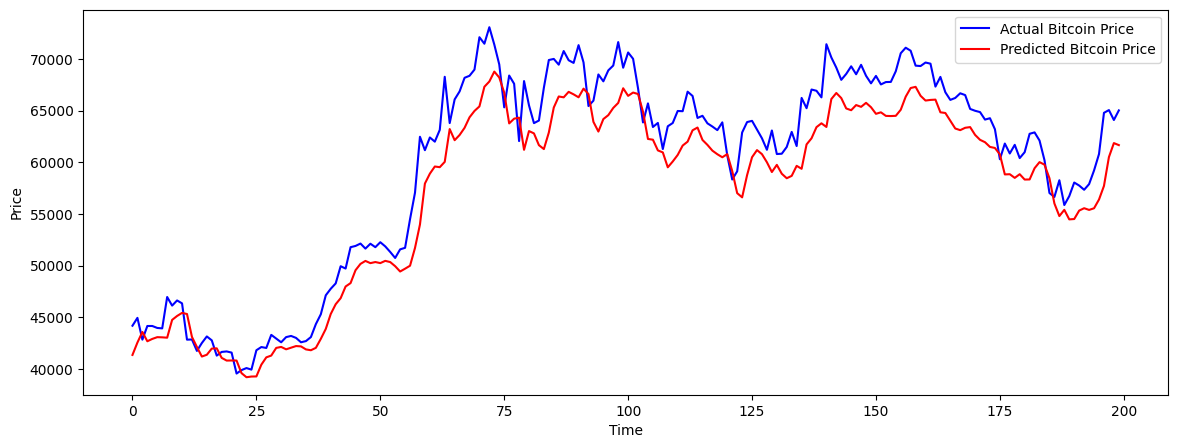

In [103]:


plt.figure(figsize=(14, 5))
plt.plot(actual, color='blue', label='Actual Bitcoin Price')
plt.plot(predictions, color='red', label='Predicted Bitcoin Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()